***OCR with meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo***

In [17]:
!pip install together dotenv

import os
import base64
import together
import dotenv

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def extract_text_from_image(image_path):
    api_key = "" # enter the api key from "https://api.together.ai/" and put the Together.ai user key here
    if not api_key:
        print("❌ Error: TOGETHER_API_KEY is missing.")
        return ""

    model = "meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo"
    client = together.Together(api_key=api_key)

    prompt = (
        "You are an advanced OCR AI trained to extract handwritten text from images. "
        "Extract all visible text accurately and return it as plain text. "
        "Do not add extra words, explanations, or formatting."
    )

    try:
        base64_image = encode_image(image_path)
        stream = client.chat.completions.create(
            model=model,
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": prompt},
                        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
                    ],
                }
            ],
            stream=True,
        )

        extracted_text = ""
        for chunk in stream:
            if not chunk.choices or not hasattr(chunk.choices[0], "delta"):
                continue
            content = chunk.choices[0].delta.content
            if content:
                extracted_text += content

        print("\nExtracted Text:\n")
        print(extracted_text)
        return extracted_text

    except Exception as e:
        print(f"❌ Error extracting text: {str(e)}")
        return ""

# Run text extraction on the provided image
image_path = "/content/Screenshot 2025-03-20 225055.png"
extract_text_from_image(image_path)


Extracted Text:

Guide all development conversations with a simple shared story of how the 'whole system works'.

* Receive the team a whole picture of describing the system, where new points fit etc.

* Identify technical entities

* Business domain.

2. Release Planning [User Stories]

* Requirements via User Stories

* Short Cards with natural language description of what a customer wants.

* Prioritized by customer.

Resource & Risk estimated by developers [Planning Game]

* Playing the planning game after each increment.


"Guide all development conversations with a simple shared story of how the 'whole system works'.\n\n* Receive the team a whole picture of describing the system, where new points fit etc.\n\n* Identify technical entities\n\n* Business domain.\n\n2. Release Planning [User Stories]\n\n* Requirements via User Stories\n\n* Short Cards with natural language description of what a customer wants.\n\n* Prioritized by customer.\n\nResource & Risk estimated by developers [Planning Game]\n\n* Playing the planning game after each increment."

***This UML sequence diagram outlines the flow of encoding an image, sending it to the Together AI API, processing the streamed response, and finally printing the extracted text.***

*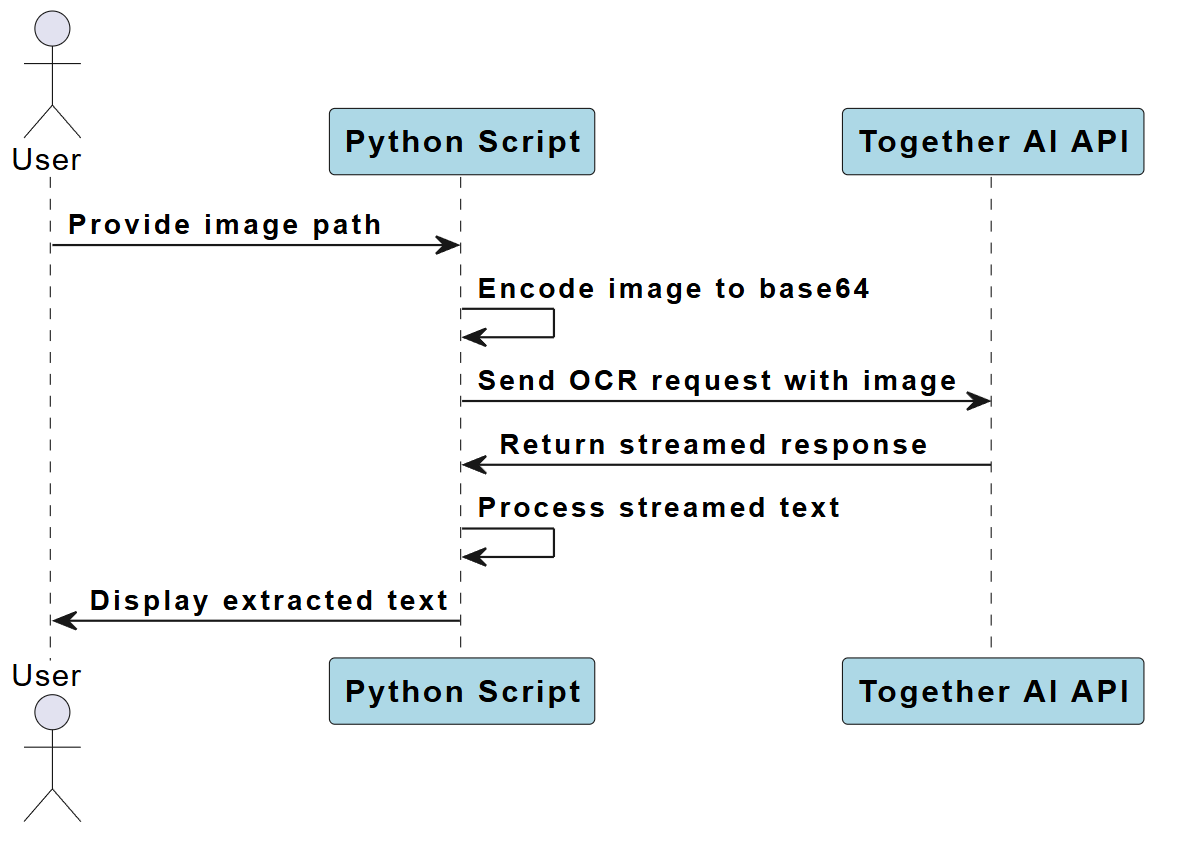*